# Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Auto-Correlation Function

The [auto-correlation function](https://en.wikipedia.org/wiki/Autocorrelation) (ACF) characterizes the temporal dependencies of a random signal $x[k]$. It is an important measure for the analysis of signals in communications engineering, coding and system identification.

### Definition

The ACF of a continuous-amplitude real-valued weakly stationary process $x[k]$ is given as

$$\varphi_{xx}[\kappa] = E\{x[k] \cdot x[k-\kappa] \}$$

where $\kappa$ is commonly chosen as sample index instead of $k$ in order to indicate that it denotes a shift/lag. The ACF quantifies the similarity of a signal with a shifted version of itself. It has high values for high similarity and low values for low similarity.

If the process is additionally weakly ergodic, the ACF can be computed by averaging along one sample function

$$\varphi_{xx}[\kappa] = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k] \cdot x[k-\kappa]$$

Note that the normalization on the left of the sum is discarded in some definitions of the ACF. Above equation resembles strongly the discrete convolution. Rearranging under the assumption of a random signal of finite length $2 K + 1$ one gets

$$\varphi_{xx}[\kappa - K] = \frac{1}{K} \sum_{k=0}^{K-1} x[k] \cdot x[k-\kappa] = \frac{1}{K} \; x[k] * x[-k]$$

where this variant of the ACF is shifted by $K$ samples in comparison to its definition. For $\kappa < 0$ and $\kappa \geq 2K$ the ACF $\varphi_{xx}[\kappa - K] = 0$. The ACF can be computed by (fast) convolution of the random signal with a time reversed version of the random signal.

### Properties

The following properties of the ACF can be deduced from its definition

1. The ACF $\varphi_{xx}[\kappa]$ has a maximum for $\kappa = 0$. It is given as

    $$ \varphi_{xx}[0] = E\{x^2[k]\} = \sigma_x^2 + \mu_x^2 $$
    
    This is due to the fact that the signal is equal to itself for $\kappa = 0$. Please note that for periodic random signals more than one maximum will be present.
    
2. The ACF is a function with even symmetry

    $$ \varphi_{xx}[\kappa] = \varphi_{xx}[-\kappa] $$
    
3. For typical random signals, the ACF approaches the limiting value

    $$ \lim_{|\kappa| \to \infty} \varphi_{xx}[\kappa] = \mu_x^2$$
    
    The similarity of a typical random signal is often low for large lags $\kappa$.

### Example

The following example computes and plots the ACF for a speech signal.

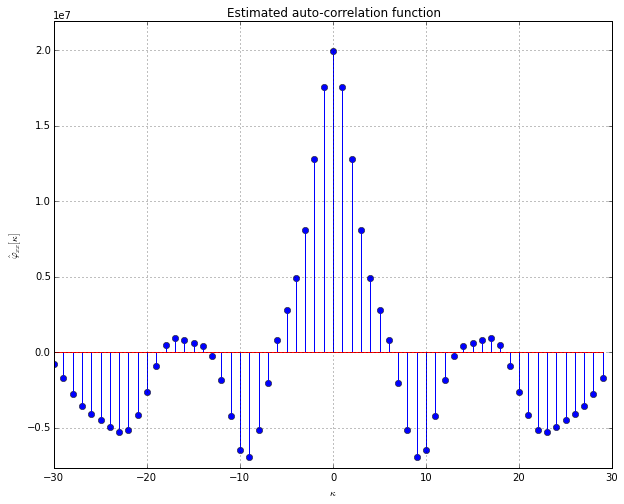

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

K = 30  # limit for lags in ACF

# read sound file 
fs, x = wavfile.read('../data/speech_8k.wav')
x = np.asarray(x, dtype=float)

# compute and truncate ACF
acf = 1/len(x) * np.correlate(x, x, mode='full')
acf = acf[len(x)-K-1:len(x)+K-1]
kappa = np.arange(-K, K)

# plot ACF
plt.figure(figsize = (10, 8))
plt.stem(kappa, acf)
plt.title('Estimated auto-correlation function')
plt.ylabel(r'$\hat{\varphi}_{xx}[\kappa]$')
plt.xlabel(r'$\kappa$')
plt.axis([-K, K, 1.1*min(acf), 1.1*max(acf)]);
plt.grid()

**Exercise**

* Does the ACF fulfill the properties stated above?
* The plot shows only a small part of the ACF. Increase the range `K` for $-K \leq \kappa < K$ and check if the last property is fulfilled for the speech signal.

## Auto-Covariance Function

The [auto-covariance function](https://en.wikipedia.org/wiki/Covariance) is the ACF for the zero-mean random signal $x[k] - \mu_x$. It is given as

$$\psi_{xx}[\kappa] = \varphi_{xx}[\kappa] - \mu_x^2 $$

## Cross-Correlation Function

The cross-correlation function (CCF) is a measure of similarity that two random signals $x[k]$ and $y[k - \kappa]$ have with respect to the temporal shift $\kappa \in \mathbb{Z}$.

### Definition

The CCF of two continuous-amplitude real-valued weakly stationary processes $x[k]$ and $y[k]$ is given as

$$\varphi_{xy}[\kappa] = E\{x[k] \cdot y[k - \kappa] \} = E\{x[k + \kappa] \cdot y[k] \}$$

If $x[k]$ and $y[k]$ are weakly ergodic processes, the CCF can be computed by averaging along one sample function

$$\varphi_{xy}[\kappa] = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k] \cdot y[k-\kappa]$$

As for the ACF, for two finite length random signals of length $2K + 1$ this can be expressed as discrete convolution

$$\varphi_{xy}[\kappa - K] = \frac{1}{K} \sum_{k=0}^{K-1} x[k] \cdot y[k-\kappa] = \frac{1}{K} \; x[k] * y[-k]$$

where this variant of the CCF is shifted by $K$ samples in comparison to its definition. For $\kappa < 0$ and $\kappa \geq 2K$ the CCF $\varphi_{xy}[\kappa - K] = 0$. The CCF can be computed by (fast) convolution of one random signal with a time reversed version of the other random signal.

### Properties

1. For an exchange of the two random signals, the CCF exhibits the following symmetry

    $$\varphi_{xy}[\kappa] = \varphi_{yx}[-\kappa]$$
    
2. The CCF is constant for [*uncorrelated*](https://en.wikipedia.org/wiki/Uncorrelated_random_variables) random signals

    $$ \varphi_{xy}[\kappa] = \mu_x \cdot \mu_y $$
    
    Typical random processes are uncorrelated for $|\kappa| \to \infty$.


### Example

The following example computes the CCF for two uncorrelated random signals

Mean of signal x[k]: 2.044971
Mean of signal y[k]: 1.000469


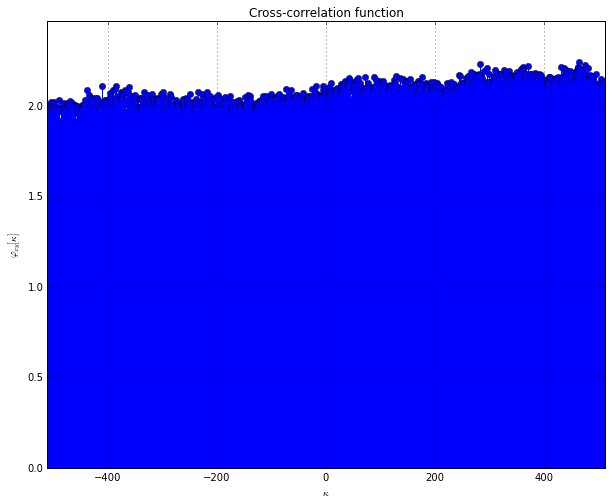

In [2]:
K = 1024  # length of random signals

# generate two uncorrelated random signals
x = 2+np.random.normal(size=K)
y = 1+np.random.normal(size=2*K)

# compute CCF
ccf = 1/len(x) * np.correlate(x, y, mode='valid')
kappa = np.arange(-K//2, K//2+1)

# print mean values of signals
print('Mean of signal x[k]: %f' %np.mean(x))
print('Mean of signal y[k]: %f' %np.mean(y))

# plot CCF
plt.figure(figsize = (10, 8))
plt.stem(kappa, ccf)
plt.title('Cross-correlation function')
plt.ylabel(r'$\varphi_{xy}[\kappa]$')
plt.xlabel(r'$\kappa$')
plt.axis([-K//2, K//2, 0, 1.1*max(ccf)]);
plt.grid()

**Exercise**

* Do you have an explanation for the values of the CCF? What would be its theoretic value? 

## Cross-Covariance Function

The [cross-covariance function](https://en.wikipedia.org/wiki/Covariance) is the CCF for the zero-mean random signals $x[k] - \mu_x$ and $y[k] - \mu_y$. It is given as

$$\psi_{xy}[\kappa] = \varphi_{xy}[\kappa] - \mu_x \mu_y $$

**Exercise**

* How would the plot for $\psi_{xy}[\kappa]$ look like for above example?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>